In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')


In [3]:
#4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.
#5. How many rows and columns are in `gdp_df`? What are the data types of each column?
gdp_df
#type(gdp_df)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

In [5]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


In [6]:
gdp_df.head()


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [7]:
gdp_df.tail()


,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


In [8]:
type(gdp_df)


pandas.core.frame.DataFrame

In [9]:
#number of rows and columns 
gdp_df.shape


(7662, 4)

In [10]:
#pd.set_option('display.max_rows', None)

6.Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [11]:
#gdp_df.columns = ['Country','Year','GDP_Per_Capita']

In [12]:
#gdp_df

In [13]:
gdp_df = gdp_df.drop(columns=['Value Footnotes']).rename(columns={
    'Country or Area': 'Country',
    'Value': 'GDP_Per_Capita'
})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
# Count per country and year!
country_year_counts = gdp_df.groupby('Country').Year.nunique()


In [15]:
print(country_year_counts)

Country
Afghanistan                    20
Africa Eastern and Southern    33
Africa Western and Central     33
Albania                        33
Algeria                        33
                               ..
Viet Nam                       33
West Bank and Gaza             29
World                          33
Zambia                         33
Zimbabwe                       33
Name: Year, Length: 242, dtype: int64


In [16]:
all_years = gdp_df['Year'].nunique() 

In [17]:
countries_with_all_years = country_year_counts[country_year_counts == all_years].index.tolist()

In [18]:
len(countries_with_all_years)

202

In [19]:
#countries missing year of data 
countries_missing_years = country_year_counts[country_year_counts < all_years]

In [20]:
countries_missing_years.count()

40

In [21]:
# number of observations per year with count 
observations_per_year = gdp_df['Year'].value_counts().sort_index()

In [22]:
observations_per_year


Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

#8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [23]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
#data_2020 = gdp_df[gdp_df['Year'] == 2020]['GDP_Per_Capita']

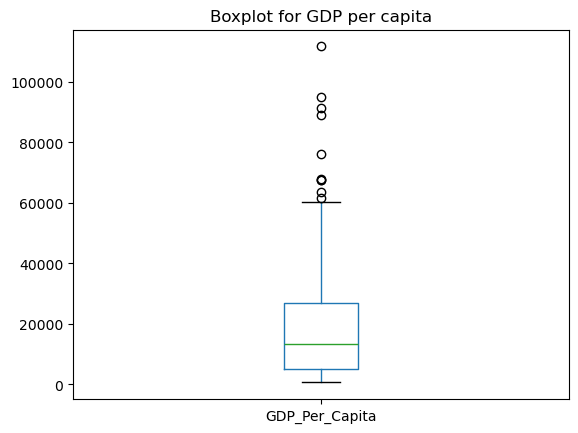

In [24]:
# Boxplot using Pandas
gdp_2020.boxplot(column =['GDP_Per_Capita'], grid = False)
#plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita')
plt.show()

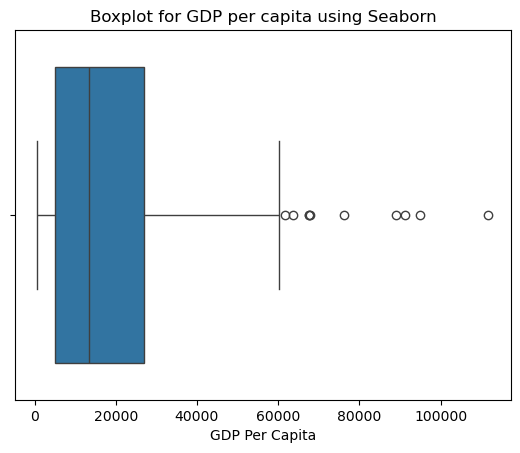

In [25]:
# Boxplot using Seaborn
sns.boxplot(data =gdp_2020, x='GDP_Per_Capita')
plt.xlabel('GDP Per Capita')
plt.title('Boxplot for GDP per capita using Seaborn')
plt.show()

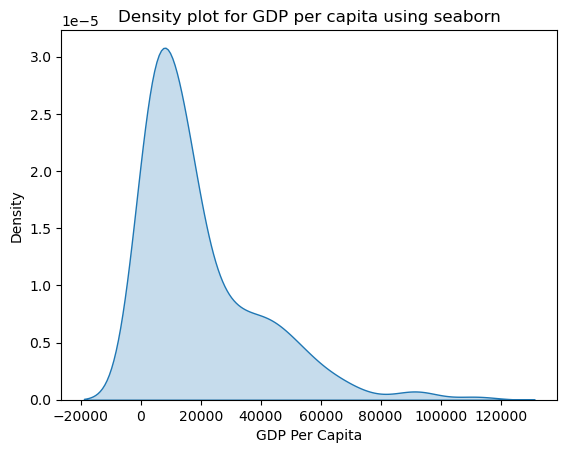

In [26]:
#Create a density plot using seaborn
sns.kdeplot(data = gdp_2020, x= 'GDP_Per_Capita', fill = 'skyblue')
plt.xlabel('GDP Per Capita')
plt.title('Density plot for GDP per capita using seaborn')
plt.show()

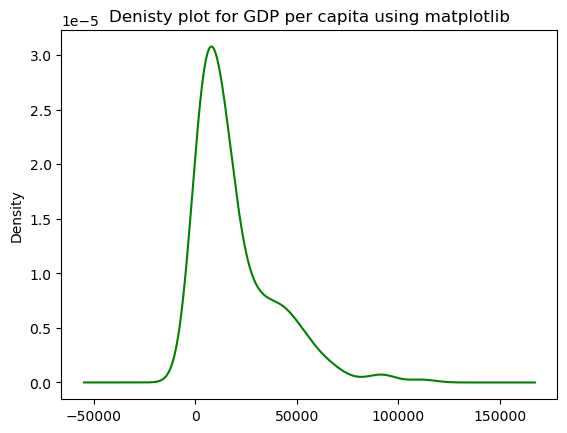

In [27]:
#Create a density plot using matplotlib
gdp_2020.GDP_Per_Capita.plot.density(color='green')
plt.title('Denisty plot for GDP per capita using matplotlib')
plt.show()

9. What was the median GDP per capita value in 2020?

In [28]:
gdp_2020 ['GDP_Per_Capita'].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [29]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

In [30]:
gdp_decades.head(10)

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
52,Africa Eastern and Southern,1990,3037.297466
55,Africa Western and Central,2020,3957.933804
65,Africa Western and Central,2010,3737.506710
75,Africa Western and Central,2000,2671.599188
85,Africa Western and Central,1990,2788.301039


In [31]:
#plt.subplot(2, 2, 1)
sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, palette="pastel")
plt.title('GDP per Capita (1990, 2000, 2010, 2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita', fontsize=12)

C:\Users\amerk\AppData\Local\Temp\ipykernel_5408\1934100828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, palette="pastel")


Text(0, 0.5, 'GDP per Capita')

In [32]:
sns.barplot(data= gdp_decades,
            x= 'Year',
            y='GDP_Per_Capita')

<Axes: title={'center': 'GDP per Capita (1990, 2000, 2010, 2020)'}, xlabel='Year', ylabel='GDP per Capita'>

In [33]:
sns.scatterplot(data=gdp_decades,
               x='Year',
               y='GDP_Per_Capita');

In [34]:
sns.regplot(data = gdp_decades, 
            x = 'Year', 
            y = 'GDP_Per_Capita');

11. Which country was the first to have a GDP per capita greater than $100,000?

In [35]:
gdp_above_100k = gdp_df[gdp_df['GDP_Per_Capita'] > 100000].sort_values('Year')

In [36]:
gdp_above_100k

,Country,Year,GDP_Per_Capita
7302,United Arab Emirates,1990,105893.626059
7301,United Arab Emirates,1991,101048.696239
7295,United Arab Emirates,1997,100956.706467
4167,Luxembourg,2001,101143.147977
4166,Luxembourg,2002,103317.331098
4165,Luxembourg,2003,104743.000088
4164,Luxembourg,2004,107634.837198
4163,Luxembourg,2005,108632.360016
4162,Luxembourg,2006,113346.035782
4161,Luxembourg,2007,120647.822959


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [37]:
top_country=gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')

In [38]:
top_country

,Country,Year,GDP_Per_Capita
4148,Luxembourg,2020,111751.314751


In [39]:
country_name=gdp_df[gdp_df['Year']==2020].nlargest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [40]:
top_country=gdp_df[gdp_df['Country'] == country_name]

In [41]:
top_country.plot(x='Year',y='GDP_Per_Capita',kind='hist');

In [42]:
top_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [43]:
# Identify the country with the lowest GDP per capita in 2020
lowest_gdp_2020 = gdp_df[gdp_df['Year'] == 2020].nsmallest(1, 'GDP_Per_Capita')

In [44]:

lowest_gdp_2020

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263


In [45]:
lowest_gdp = gdp_df[gdp_df['Year']==2020].nsmallest(1,'GDP_Per_Capita')['Country'].tolist()[0]

In [46]:
lowest_gdp

'Burundi'

In [47]:
lowest_country= gdp_df[gdp_df['Country'] == lowest_gdp]

In [48]:
lowest_country

,Country,Year,GDP_Per_Capita
971,Burundi,2022,708.178317
972,Burundi,2021,714.066712
973,Burundi,2020,711.355263
974,Burundi,2019,729.658463
975,Burundi,2018,740.448223
976,Burundi,2017,750.787616
977,Burundi,2016,764.336602
978,Burundi,2015,781.579287
979,Burundi,2014,831.294839
980,Burundi,2013,824.610523


In [49]:
lowest_country.plot(x='Year',y='GDP_Per_Capita',kind='line');

In [50]:
gdp_1990 = gdp_df[gdp_df['Year'] == 1990][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_1990'})
gdp_2020 = gdp_df[gdp_df['Year'] == 2020][['Country', 'GDP_Per_Capita']].rename(columns={'GDP_Per_Capita': 'GDP_2020'})

In [51]:
# Merge the data for comparison
gdp_comparison = pd.merge(gdp_1990, gdp_2020, on='Country', how='inner')

In [52]:
# Find countries with lower GDP in 2020 than 1990
lower_gdp_2020 = gdp_comparison[gdp_comparison['GDP_2020'] < gdp_comparison['GDP_1990']]

In [53]:
# Results with lowest and 2020 and 1990
f"The country with the lowest GDP per capita in 2020 is: {lowest_country}"
"\nCountries with lower GDP per capita in 2020 than in 1990:"
lower_gdp_2020[['Country', 'GDP_1990', 'GDP_2020']]

,Country,GDP_1990,GDP_2020
15,Barbados,14097.395550,13805.777541
25,Brunei,70358.724094,61603.550804
28,Burundi,1175.155086,711.355263
34,Central African Republic,1200.613390,847.765012
41,Congo,5007.319245,3384.654335
45,Dem. Rep. Congo,1750.169739,1044.071214
66,Fragile and conflict affected situations,4864.814075,4357.621312
68,Gabon,17559.006114,13903.288955
76,Guinea-Bissau,1998.173206,1803.630591
78,Haiti,3612.815105,2970.462845


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [54]:
file_path = "../data/internet_use.csv"

In [55]:
#internet_df = pd.read_csv ('/../data/internet_use.csv')
internet_df = pd.read_csv(file_path, nrows = 6083)

In [56]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


In [57]:
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN
6082,Zimbabwe,1990,0.000000,NaN


In [58]:
internet_df.shape


(6083, 4)

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [59]:
internet_df = internet_df.drop(columns=['Value Footnotes']).rename(columns={
    'Country or Area': 'Country',
    'Value': 'Internet_Users_Pct'
})

In [60]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

In [61]:
observations_per_year =internet_df['Year'].value_counts().sort_index()

In [62]:
observations_per_year


Year
1990    226
1991     39
1992     50
1993     66
1994     92
1995    141
1996    177
1997    188
1998    195
1999    207
2000    210
2001    212
2002    214
2003    208
2004    210
2005    212
2006    212
2007    217
2008    214
2009    214
2010    209
2011    214
2012    209
2013    203
2014    204
2015    203
2016    206
2017    205
2018    174
2019    185
2020    186
2021    186
2022    184
2023     11
Name: count, dtype: int64

In [63]:
observations_per_year_df = observations_per_year.reset_index()
observations_per_year_df.columns = ['Year', 'Number of Observations']

In [64]:
observations_per_year_df


,Year,Number of Observations
0,1990,226
1,1991,39
2,1992,50
3,1993,66
4,1994,92
5,1995,141
6,1996,177
7,1997,188
8,1998,195
9,1999,207


17. What is the first year to have a non-zero internet users percentage value?

In [65]:
non_zero_internet = internet_df[internet_df['Internet_Users_Pct']>0]

In [66]:
First_year = non_zero_internet['Year'].min()

In [67]:
First_year

1990

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [69]:
data_2000 = internet_df[internet_df['Year'] == "2000"]['Internet_Users_Pct']
data_2014 = internet_df[internet_df['Year'] == "2014"]['Internet_Users_Pct']

19. For how many countries was the percentage of internet users below 5% in 2014?

In [75]:
below_2014 = internet_df[(internet_df['Year'] == "2014") & (internet_df['Internet_Users_Pct'] < 5)]